<a href="https://colab.research.google.com/github/HVTrieuDuong/TRI-TUE-NHAN-TAO-HCMUTE/blob/main/Cuoiky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array

In [2]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/9flowers',target_size=(150,150), batch_size=32, class_mode='categorical')
training_set.class_indices

Found 883 images belonging to 9 classes.


{'Bird of Paradise': 0,
 'daisy': 1,
 'dandelion': 2,
 'lotus': 3,
 'peach blossom': 4,
 'rose': 5,
 'sunflower': 6,
 'tulip': 7,
 'water lily': 8}

In [6]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

In [7]:
#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(9,activation='softmax'))

In [8]:
#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()
train=model.fit(training_set,epochs=50,batch_size=128,verbose=1)
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

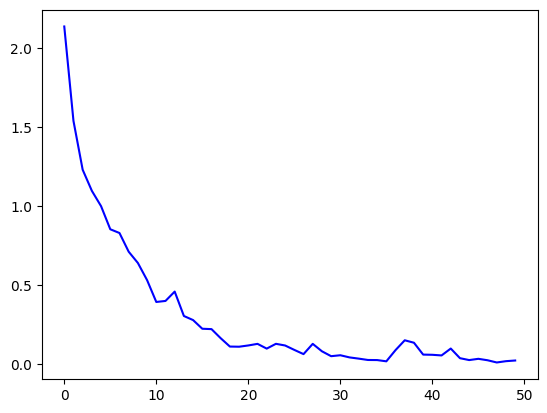

In [9]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show() 

In [13]:
# Lưu 
model.save("/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/CuoikiAI.h5")
model_1=load_model('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/CuoikiAI.h5')
folder="/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/flowers test"

1/1 [==============================] - 0s 115ms/step
sunflower


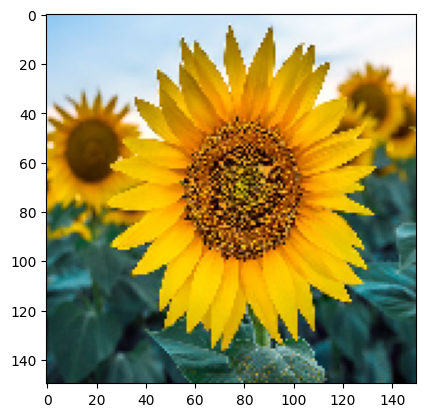

In [14]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/hoa4.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Bird of Paradise','daisy','dandelion','lotus','peach blossom','rose','sunflower','tulip','water lily']
  print(class_name[result])
  plt.show()

1/1 [==============================] - 0s 48ms/step
daisy


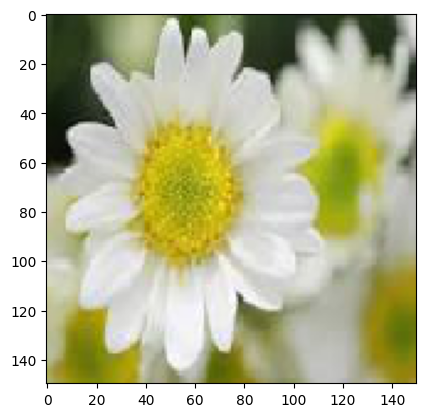

In [15]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/hoa3.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Bird of Paradise','daisy','dandelion','lotus','peach blossom','rose','sunflower','tulip','water lily']
  print(class_name[result])
  plt.show()

1/1 [==============================] - 0s 77ms/step
lotus


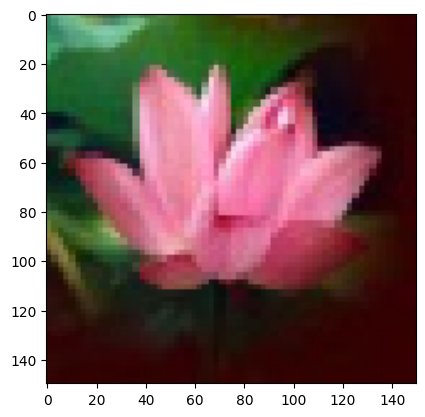

In [16]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/hoa2.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Bird of Paradise','daisy','dandelion','lotus','peach blossom','rose','sunflower','tulip','water lily']
  print(class_name[result])
  plt.show()

1/1 [==============================] - 0s 60ms/step
tulip


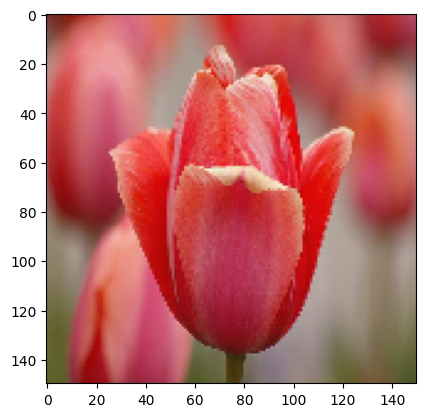

In [17]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/hoa1.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Bird of Paradise','daisy','dandelion','lotus','peach blossom','rose','sunflower','tulip','water lily']
  print(class_name[result])
  plt.show()